In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

1、	通过Tensor构建数据集及通过元组构建数据集

In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 6]))  #使用tensor的切片创建Dataset

In [ ]:
dataset1.element_spec #查看类型

TensorSpec(shape=(6,), dtype=tf.float32, name=None)

In [ ]:
#遍历元素
for elem in dataset1:
	print(elem.numpy())

[0.09459329 0.34550595 0.6159234  0.88886404 0.5028559  0.70084393]
[0.42437446 0.7931205  0.9504651  0.38431084 0.6671772  0.2826805 ]
[0.82969224 0.5249138  0.7906146  0.577886   0.62052464 0.45538628]
[0.36327314 0.11540079 0.6032635  0.60235155 0.7948265  0.47879136]


In [ ]:
#转成numpy的iterator
dataset_np_iter=dataset1.as_numpy_iterator()
print(list(dataset_np_iter)) #打印输出

[array([0.09459329, 0.34550595, 0.6159234 , 0.88886404, 0.5028559 ,
       0.70084393], dtype=float32), array([0.42437446, 0.7931205 , 0.9504651 , 0.38431084, 0.6671772 ,
       0.2826805 ], dtype=float32), array([0.82969224, 0.5249138 , 0.7906146 , 0.577886  , 0.62052464,
       0.45538628], dtype=float32), array([0.36327314, 0.11540079, 0.6032635 , 0.60235155, 0.7948265 ,
       0.47879136], dtype=float32)]


In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 10], maxval=10, dtype=tf.int32)))

dataset2.element_spec #查看类型

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(10,), dtype=tf.int32, name=None))

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3.element_spec


(TensorSpec(shape=(6,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(10,), dtype=tf.int32, name=None)))

2、	生成线性分布的模拟数据并转化成Dataset数据集

创建实例

In [ ]:
# 产生0-10之间随机分布的3000个值，shape:3000x3
x = np.random.uniform(0, 10, size=(3000, 3))

w = np.array([[2.], [1.], [3.]])
# 按线性关系生成y，并加入随机噪声
y = np.matmul(x, w) + 4.5 + np.random.randn(3000, 1)

# x, y组合成Dataset数据集
dataset = tf.data.Dataset.from_tensor_slices((x, y))

查看Dataset结构

In [ ]:
dataset.element_spec

(TensorSpec(shape=(3,), dtype=tf.float64, name=None),
 TensorSpec(shape=(1,), dtype=tf.float64, name=None))

输出前4项

In [ ]:
for elem in dataset.take(4):
  print(elem)

(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([6.76742395, 3.60273531, 6.01742619])>, <tf.Tensor: shape=(1,), dtype=float64, numpy=array([39.30437658])>)
(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.44741216, 2.91693053, 1.22997909])>, <tf.Tensor: shape=(1,), dtype=float64, numpy=array([12.8986384])>)
(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.7961134 , 5.6437764 , 6.19920871])>, <tf.Tensor: shape=(1,), dtype=float64, numpy=array([29.0962137])>)
(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([9.25931388, 9.4550141 , 1.78977729])>, <tf.Tensor: shape=(1,), dtype=float64, numpy=array([38.91804726])>)


使用zip函数

In [ ]:
dataset1=tf.data.Dataset.from_tensor_slices(x)
dataset2=tf.data.Dataset.from_tensor_slices(y)
dataset3=tf.data.Dataset.zip((dataset1, dataset2))

dataset3.element_spec

(TensorSpec(shape=(3,), dtype=tf.float64, name=None),
 TensorSpec(shape=(1,), dtype=tf.float64, name=None))

打乱dataset并生成批次

In [ ]:
dt = dataset.shuffle(3000).batch(10)
for elem in dt.take(1):
  print(elem)

(<tf.Tensor: shape=(10, 3), dtype=float64, numpy=
array([[5.65658787, 8.34404424, 0.75685643],
       [8.08539423, 7.8367932 , 1.07406491],
       [8.30395546, 3.4589282 , 0.16406877],
       [7.91173192, 8.52138187, 0.26424614],
       [1.03860066, 1.50907117, 9.46475816],
       [7.64366505, 9.64924726, 2.39031226],
       [4.62964135, 7.81353266, 5.72327481],
       [9.42346863, 0.88196196, 6.85070395],
       [5.46990612, 9.80165514, 5.70979925],
       [6.48053464, 2.8240728 , 7.52578847]])>, <tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[26.25941173],
       [32.52160998],
       [24.30553114],
       [29.86862584],
       [38.76612257],
       [36.00017072],
       [39.07539877],
       [44.28003464],
       [41.16518882],
       [43.20997159]])>)


3、	Tensorflow datasets数据集

In [ ]:
# 查看可用数据集
import tensorflow_datasets as tfds

tfds.list_builders()


['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

使用tfds方法，读取mnist数据集，构建Dataset

In [ ]:
mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.
<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [ ]:
horses_train =tfds.load(name="horses_or_humans", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(horses_train)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteMCQHEJ/horses_or_humans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteMCQHEJ/horses_or_humans-test.tfrecord


Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
<DatasetV1Adapter shapes: {image: (300, 300, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>


Label: 0
Label: 0
Label: 0
Label: 0
Label: 0
Label: 0
Label: 0
Label: 1
Label: 1
Label: 1
Label: 1
Label: 1
Label: 0
Label: 1
Label: 1


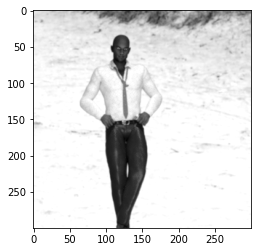

In [ ]:
for horses_example in horses_train.take(15): #只取一个样本
  image, label = horses_example["image"], horses_example["label"]

  plt.imshow(image.numpy()[:, :, 0].astype(np.float32),
cmap = plt.get_cmap("gray"))
  print("Label: %d"% label.numpy())

显示首个图片

Label: 4


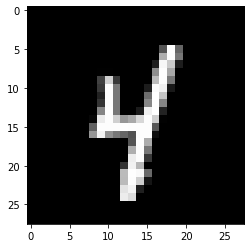

In [ ]:
for mnist_example in mnist_train.take(1): #只取一个样本
  image, label = mnist_example["image"], mnist_example["label"]

  plt.imshow(image.numpy()[:, :, 0].astype(np.float32),
cmap = plt.get_cmap("gray"))
  print("Label: %d"% label.numpy())

通过DatasetBuilder实现上述相同功能

In [ ]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split="train")
mnist_train

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

通过tf.data接口，实现重复数据集，以便有无限的的样本流，并随机打乱创建大小为32的批次

In [ ]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)
mnist_train

<DatasetV1Adapter shapes: {image: (None, None, None, 28, 28, 1), label: (None, None, None)}, types: {image: tf.uint8, label: tf.int64}>